**CNN - Convolutional Neural Network**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

loc = '/content/drive/MyDrive/Mask/Dataset/train'

img_loc = ['cloth' , 'n95' , 'n95v' , 'nfm' , 'srg']

import cv2

features = []

for img in img_loc:
    k = os.path.join(loc,img)
    for i in os.listdir(k):
        f = cv2.imread(os.path.join(k,i))
        f = cv2.resize(f,(150,150))
        features.append(f)

In [ ]:
import numpy as np
X = np.array(features)

In [ ]:
labels = []

l = 0

for img in img_loc:
    k = os.path.join(loc,img)
    for i in os.listdir(k):
        labels.append(l)
    l += 1

In [ ]:
Y = np.array(labels)

In [ ]:
import keras
from keras.utils import np_utils

Yt = np_utils.to_categorical(Y)

In [ ]:
mean = np.mean(X)
std = np.std(X)

Xt = (X - mean) / std

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xt,Yt,train_size=0.8)

CNN-1

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation , Flatten, Conv2D, MaxPooling2D, Dropout
from keras import regularizers
import numpy as np
from keras import optimizers

In [ ]:
weight_decay = 0.0001

cnn1 = Sequential()
model.add(Conv2D(32 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay) , input_shape=xtrain.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(Conv2D(64 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(Conv2D(128 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(Conv2D(256 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(Conv2D(512 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(1024 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(Conv2D(1024 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(2048 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(Conv2D(2048 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(5 , activation='sigmoid'))

In [ ]:
model = Sequential() 
model.add(Flatten(input_shape=xtrain.shape[1:])) 
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3)) 
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['acc'])

In [ ]:
cnn2 = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=xtrain.shape[1:]))
cnn.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(128, activation='relu'))
cnn.add(keras.layers.Dense(64, activation='relu'))
cnn.add(keras.layers.Dense(5, activation='softmax'))

# finally compile and train the cnn
cnn.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
cnn1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 activation_24 (Activation)  (None, 150, 150, 32)      0         
                                                                 
 conv2d_25 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 activation_25 (Activation)  (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 75, 75, 32)        0         
                                                      

In [ ]:
cnn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 48)      1344      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 48)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 48)        20784     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 48)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 32)        13856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 32)      

In [ ]:
cnn1.compile(optimizer='sgd' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

* verbose = 0 :- will show nothing during training or silent
* verbose = 1 :- will show an animated progress bar [==========================]
* verbose = 2 :- will just mention the number of epochs like 1/20

In [ ]:
cnn2.fit(xtrain,ytrain,epochs=25, batch_size=64 , validation_data=(xtest,ytest))

Epoch 1/25
25/25 [==============================] - 2s 69ms/step - loss: 1.5624 - accuracy: 0.3465 - val_loss: 1.4814 - val_accuracy: 0.4184
Epoch 2/25
25/25 [==============================] - 1s 58ms/step - loss: 1.4068 - accuracy: 0.4597 - val_loss: 1.3407 - val_accuracy: 0.4694
Epoch 3/25
25/25 [==============================] - 1s 57ms/step - loss: 1.2719 - accuracy: 0.5026 - val_loss: 1.5065 - val_accuracy: 0.3903
Epoch 4/25
25/25 [==============================] - 1s 58ms/step - loss: 1.1976 - accuracy: 0.5352 - val_loss: 1.2313 - val_accuracy: 0.4847
Epoch 5/25
25/25 [==============================] - 1s 58ms/step - loss: 1.0906 - accuracy: 0.5723 - val_loss: 1.1335 - val_accuracy: 0.5638
Epoch 6/25
25/25 [==============================] - 1s 57ms/step - loss: 1.0484 - accuracy: 0.5946 - val_loss: 1.0555 - val_accuracy: 0.5918
Epoch 7/25
25/25 [==============================] - 1s 58ms/step - loss: 0.9977 - accuracy: 0.6170 - val_loss: 1.0135 - val_accuracy: 0.5995
Epoch 8/25
25

In [ ]:
cnn1.fit(xtrain,ytrain,epochs=25, batch_size=64 , validation_data=(xtest,ytest))

Epoch 1/25
25/25 [==============================] - 6s 213ms/step - loss: 1.9412 - accuracy: 0.2212 - val_loss: 1.9402 - val_accuracy: 0.2806
Epoch 2/25
25/25 [==============================] - 5s 200ms/step - loss: 1.9389 - accuracy: 0.2263 - val_loss: 1.9374 - val_accuracy: 0.2806
Epoch 3/25
25/25 [==============================] - 5s 201ms/step - loss: 1.9351 - accuracy: 0.2302 - val_loss: 1.9358 - val_accuracy: 0.2806
Epoch 4/25
25/25 [==============================] - 5s 203ms/step - loss: 1.9288 - accuracy: 0.2327 - val_loss: 1.9336 - val_accuracy: 0.2806
Epoch 5/25
25/25 [==============================] - 5s 204ms/step - loss: 1.9232 - accuracy: 0.2359 - val_loss: 1.9321 - val_accuracy: 0.3240
Epoch 6/25
25/25 [==============================] - 5s 205ms/step - loss: 1.9173 - accuracy: 0.2398 - val_loss: 1.9326 - val_accuracy: 0.3367
Epoch 7/25
25/25 [==============================] - 5s 205ms/step - loss: 1.9109 - accuracy: 0.2647 - val_loss: 1.9273 - val_accuracy: 0.3393
Epoch 

In [ ]:
cnn1.evaluate(xtrain,ytrain)

49/49 [==============================] - 2s 37ms/step - loss: 1.8212 - accuracy: 0.3645


[1.821240782737732, 0.3644501268863678]

In [ ]:
cnn1.evaluate(xtest,ytest)

13/13 [==============================] - 1s 38ms/step - loss: 1.8348 - accuracy: 0.3750


[1.834800362586975, 0.375]

In [ ]:
cnn2.evaluate(xtrain,ytrain)


49/49 [==============================] - 1s 14ms/step - loss: 0.4836 - accuracy: 0.8095


[0.4836464822292328, 0.8094629049301147]

In [ ]:
cnn2.evaluate(xtest,ytest)


13/13 [==============================] - 0s 16ms/step - loss: 1.0442 - accuracy: 0.5995


[1.0442192554473877, 0.5994898080825806]

In [ ]:
cnn.predict(xtest[4].reshape(1,150,150,3))

array([[9.9999452e-01, 6.9278832e-12, 1.0252351e-07, 8.3745147e-07,
        4.5412344e-06]], dtype=float32)

In [ ]:
model.predict(xtest[4].reshape(1,150,150,3))


array([[9.1505533e-01, 2.3637988e-02, 1.5202377e-03, 6.3841115e-04,
        5.9148062e-02]], dtype=float32)

In [ ]:
np.argmax(model.predict(xtest[40].reshape(1,150,150,3)))

3

In [ ]:
print(img_loc[np.argmax(cnn.predict(xtest[98].reshape(1,150,150,3)))])

n95v


In [ ]:
print(img_loc[np.argmax(cnn.predict(xtest[98].reshape(1,150,150,3)))])


n95v


In [ ]:
print(img_loc[np.argmax(ytest[98])])

n95v


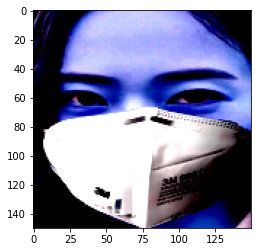

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(xtest[98])
plt.show()

In [ ]:
ytest_pred = np.argmax(model.predict(xtest) , axis = 1)
ytest_label = np.argmax(ytest , axis = 1)

from sklearn.metrics import confusion_matrix
confusion_matrix(ytest_label , ytest_pred)

array([[46,  2,  8,  5, 16],
       [ 9, 40, 20,  7,  7],
       [11,  4, 48,  7,  8],
       [ 9,  0,  2, 89,  1],
       [ 8,  3, 12,  6, 24]])

**Save the Model**

In [ ]:
model.save('my_model.h5') 

In [ ]:
import pickle
with open ('model_pickle','wb') as f:
  pickle.dump(model,f)

In [ ]:
import pickle
with open ('model_pickle','rb') as f:
  mod = pickle.load(f)

In [ ]:
mod.predict(xtest[20].reshape(1,150,150,3))

array([[0.628602  , 0.6163982 , 0.6035589 , 0.15153882, 0.67783165]],
      dtype=float32)